# Лабораторная работа

## Линейные модели, SVM и деревья решений.

#### Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

### Требования к отчету:

Отчет по лабораторной работе должен содержать:

1. титульный лист;
2. описание задания;
3. текст программы;
4. экранные формы с примерами выполнения программы.

### Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
   - одну из линейных моделей;
   - SVM;
   - дерево решений.
5. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
6. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
7. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

### Дополнительные задания:

 - Проведите эксперименты с важностью признаков в дереве решений.
 - Визуализируйте дерево решений.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('iris_.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Проведём кодирование категориального признака

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = le.fit_transform(df['Species'])

In [6]:
df1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df['Species'] = pd.Series(df1)

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
X = df.drop(["Species"], axis=1) 
y = df["Species"]

#### Разобьем датасет на тренировочный и обучающий

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42 )

#### Медель логистической регрессии

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Оценим качество модели с помощью метрик

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.9375
1.0


In [13]:
from sklearn.metrics import recall_score
print(recall_score(y_train, clf.predict(X_train), average='weighted'))
print(recall_score(y_test, clf.predict(X_test), average='weighted'))

0.9375
1.0


In [14]:
from sklearn.metrics import precision_score
print(precision_score(y_train, clf.predict(X_train), average='weighted'))
print(precision_score(y_test, clf.predict(X_test), average='weighted'))

0.939278455284553
1.0


#### Модель дерево решений

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Оценим качество модели с помощью метрик

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, clf1.predict(X_train)))
print(accuracy_score(y_test, clf1.predict(X_test)))

1.0
1.0


In [17]:
from sklearn.metrics import recall_score
print(recall_score(y_train, clf1.predict(X_train), average='weighted'))
print(recall_score(y_test, clf1.predict(X_test), average='weighted'))

1.0
1.0


In [18]:
from sklearn.metrics import precision_score
print(precision_score(y_train, clf1.predict(X_train), average='weighted'))
print(precision_score(y_test, clf1.predict(X_test), average='weighted'))

1.0
1.0


#### Модель SVM

In [27]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear')
clf2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Оценим качество модели с помощью метрик

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, clf2.predict(X_train)))
print(accuracy_score(y_test, clf2.predict(X_test)))

1.0
1.0


In [29]:
from sklearn.metrics import recall_score
print(recall_score(y_train, clf2.predict(X_train), average='weighted'))
print(recall_score(y_test, clf2.predict(X_test), average='weighted'))

1.0
1.0


In [30]:
from sklearn.metrics import precision_score
print(precision_score(y_train, clf2.predict(X_train), average='weighted'))
print(precision_score(y_test, clf2.predict(X_test), average='weighted'))

1.0
1.0


Дерево решений и модель опорных векторов дают максимальные значения точности, аккуратности и полноты.
Логистическая регрессия показывает ниже значения на тренировочном сете, а на тренировочном тоже максимальный.

#### Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.

In [32]:
from sklearn.model_selection import GridSearchCV

In [37]:
parametrs = {'max_iter' : [10000], 'C' : range(1,30)}

search = GridSearchCV(LogisticRegression(),parametrs, cv=5)
search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default mu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': range(1, 30), 'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
search.best_params_

{'C': 6, 'max_iter': 10000}

In [54]:
print(accuracy_score(y_train, search.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, search.best_estimator_.predict(X_test)))
print('\n')

print(recall_score(y_train, search.best_estimator_.predict(X_train), average='weighted'))
print(recall_score(y_test, search.best_estimator_.predict(X_test), average='weighted'))
print('\n')

print(precision_score(y_train, search.best_estimator_.predict(X_train), average='weighted'))
print(precision_score(y_test, search.best_estimator_.predict(X_test), average='weighted'))

1.0
1.0


1.0
1.0


1.0
1.0


In [42]:
params = {'kernel' : ['linear', 'poly']}

search1 = GridSearchCV(SVC(), params, cv=5)

In [43]:
search1.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'kernel': ['linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
print(accuracy_score(y_train, search1.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, search1.best_estimator_.predict(X_test)))
print('\n')

print(recall_score(y_train, search1.best_estimator_.predict(X_train), average='weighted'))
print(recall_score(y_test, search1.best_estimator_.predict(X_test), average='weighted'))
print('\n')

print(precision_score(y_train, search1.best_estimator_.predict(X_train), average='weighted'))
print(precision_score(y_test, search1.best_estimator_.predict(X_test), average='weighted'))

1.0
1.0


1.0
1.0


1.0
1.0


In [48]:
parametr = {'max_depth' : range(1,12), 'min_samples_split' : range(2,9), 'min_samples_leaf' : range(1,7)}

In [49]:
search2 = GridSearchCV(DecisionTreeClassifier(), parametr, cv=5)
search2.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 12),
                         'min_samples_leaf': range(1, 7),
                         '

In [53]:
search2.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [56]:
print(accuracy_score(y_train, search2.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, search2.best_estimator_.predict(X_test)))
print('\n')

print(recall_score(y_train, search2.best_estimator_.predict(X_train), average='weighted'))
print(recall_score(y_test, search2.best_estimator_.predict(X_test), average='weighted'))
print('\n')

print(precision_score(y_train, search2.best_estimator_.predict(X_train), average='weighted'))
print(precision_score(y_test, search2.best_estimator_.predict(X_test), average='weighted'))

1.0
1.0


1.0
1.0


1.0
1.0


Подобрав одного гиперпараметра с использованием GridSearchCV и кросс-валидации, значения выбранных метрик стали несколько лучше исходных.

### Визуализируем дерево решений

[Text(200.88000000000002, 181.2, 'X[0] <= 100.5\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 2.45\ngini = 0.499\nsamples = 74\nvalue = [35, 39, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

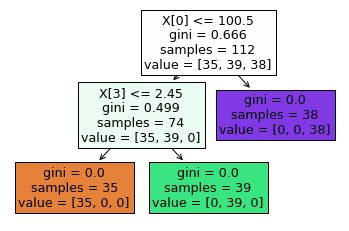

In [58]:
from sklearn import tree
tree.plot_tree(clf1, filled=True)